In [1]:
import numpy as np

cfile = np.loadtxt('../dataset/coughvid_20211012/covid.txt')
print(cfile.shape)

(1000, 22050)


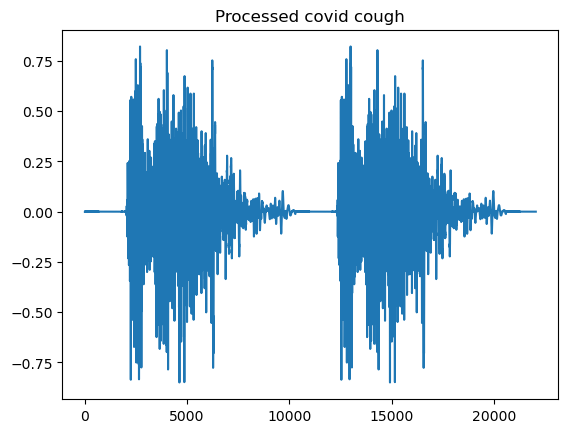

In [2]:
import matplotlib.pyplot as plt

data = cfile[0]

plt.figure()
plt.plot(data)
plt.title('Processed covid cough')
plt.show()

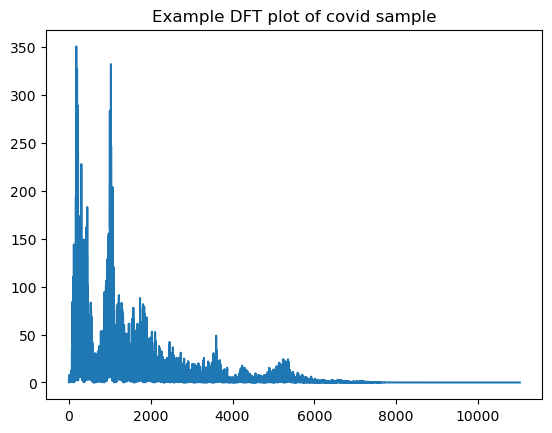

In [5]:
fft = np.fft.fft(data)
n = len(fft)
w = np.fft.fftfreq(n, d=1/22050)

plt.figure()
plt.plot(w[:n//2], abs(fft[:n//2]))
plt.title('Example DFT plot of covid sample')
plt.show()

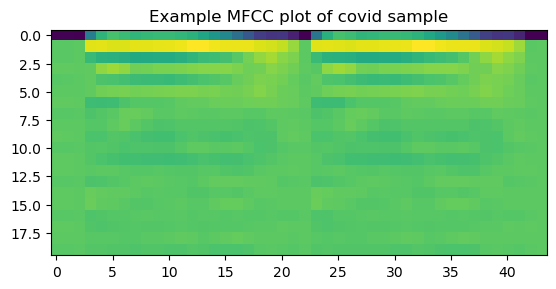

In [9]:
import librosa

test = librosa.feature.mfcc(y=data)

plt.figure()
plt.imshow(test)
plt.title('Example MFCC plot of covid sample')
plt.show()

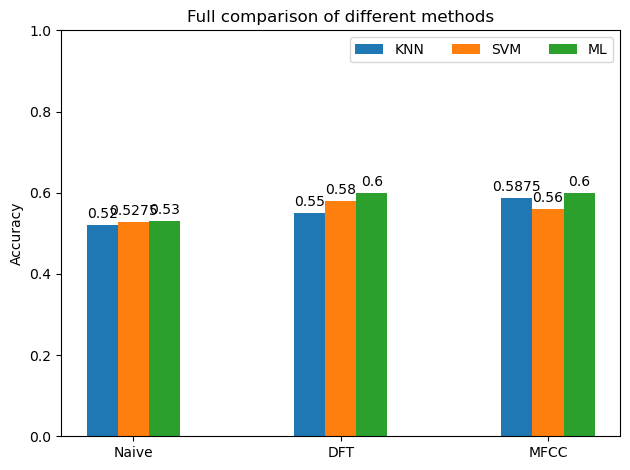

In [23]:
info = dict()
info['KNN'] = [0.52, 0.55, 0.5875]
info['SVM'] = [0.5275, 0.58, 0.56]
info['ML'] = [0.53, 0.60, 0.60]

names = ['Naive', 'DFT', 'MFCC']

x = np.arange(len(names))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(layout='tight')

for key, value in info.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('Full comparison of different methods')
ax.set_xticks(x + width, names)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 1)

plt.show()